I started this project because I wanted to reproduce the Laffer curve -- this is a very famous plot showing tax revenue vs tax rate. Here's the summary:
1) $t\rightarrow 0$: When the tax rate is zero, the government gets no revenue, because it collects nothing.
2) $t\rightarrow 1$: Now as the tax rate reaches 1, nobody works (because they get to keep nothing they earn) and so again the government gets no revenue.
3) $0<t<1$: Here, people keep some of what they earn, and so they are incentivized to work. Meanwhile, the government gets a cut as well.

Whenever I hear about the Laffer curve, it's usually described at this level - usually there's a story involving Laffer drawing something like a graph on a napkin for Reagan or somebody.

I have no idea why it got named after Laffer, because there's no way he was the first person to realize something so obvious. A quick glance at [wikipedia](https://en.wikipedia.org/wiki/Laffer_curve) indicates that he _was_ the first person to claim that we were on the descending side of the peak -- which would just be so unbelievably convenient for a bunch of rich guys who already want taxes to be lower.

Anyway, I want to see if I could observe the Laffer curve from some kind of first-principles argument, rather than just an intuitive napkin-sketch. 

I'll start out by making a model of an economy that we can play around with. 

Basically, I want to look at the effects of taxing a population.

We'll begin with a super simple toy model for an economy and add complexity from there. 

## Personal Utility Function: $U(x)$

Our first step is to have some way of determining how much each person works. 
To figure this out, we need to put together a utility function for each person, which is a function of how much they work. 

Let's define the building blocks:

 - $B(z)$: The utility gained from getting income $z$ 
$$
B(z) = \beta \log(z)
$$
($\beta$ is like greed). I'm making this Logarithmic because that's roughly how people's happiness seems to respond to incomes. Initially I was thinking of making this function $\propto \log(z+1)$ -- meaning that when you have no income, you get zero happiness. But I think a more accurate function would reflect that zero income doesn't just contribute 0 utility, it means you're destitute and living on the sidewalk (which I would guess is not too far from $-\infty$)

 - $m(x)$: the amount of money earned by an individual exerting themself a degree $x$
We'll say that 
$$
m(x) = s x
$$
Here, $s$ is like skill, and $x$ is basically how much they're working.

 - $C(x)$: The personal cost of working an amount $x$
$$
C(x) = \gamma x
$$
($\gamma$ is like laziness)


 - $t$: A flat tax rate (flat for simplicity), which tells us what fraction of a person's salary the government takes.

 # Computing Production

Now let's figure out how much each person will work: $x^*$

We expect people will maximize their utility - exerting themselves until they feel it is no longer worth it. Of course, everyone has the choice to not work at all, and nobody works a negative amount. Therefore we can write:

$$
x^* = \max(0, x^* \ s.t. \  \frac{dU}{dx}|_{x^*} = 0)
$$


### Utility Version 0

As our simplest possible model, let's use the following (bleak) assumptions:
 - flat tax rate: everyone has a fraction $t$ of their earnings taken
 - taxes = pure theft: the revenue the government collects from you through taxes contributes nothing to your life. In other words, there's no social safety net. The only way anyone gets income is by working 
 - everybody is a clone: All parameters are the same for each person in the society

This gives us 
$$
U(x) = \beta \log((1-t)sx) - \gamma x
$$

Interestingly, here it doesn't matter what the tax rate is. Whatever the government taxes us, we will be working an amount 
$$
x^* = \beta / \gamma
$$
The only effect that taxes have here is to make everyone sadder

$$
U(x) = \beta \log((1-t)sx) - \gamma x = \beta \log(sx) - \gamma x + \beta \log(1-t) = U_{t=0}(x) - |\beta \log(1-t)|
$$
$$
U(x) = U_{t=0}(x) - |\beta \log(1-t)|
$$

Let's introduce a little complexity to see how we can make this more interesting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import minimize_scalar
import scipy
from collections import defaultdict

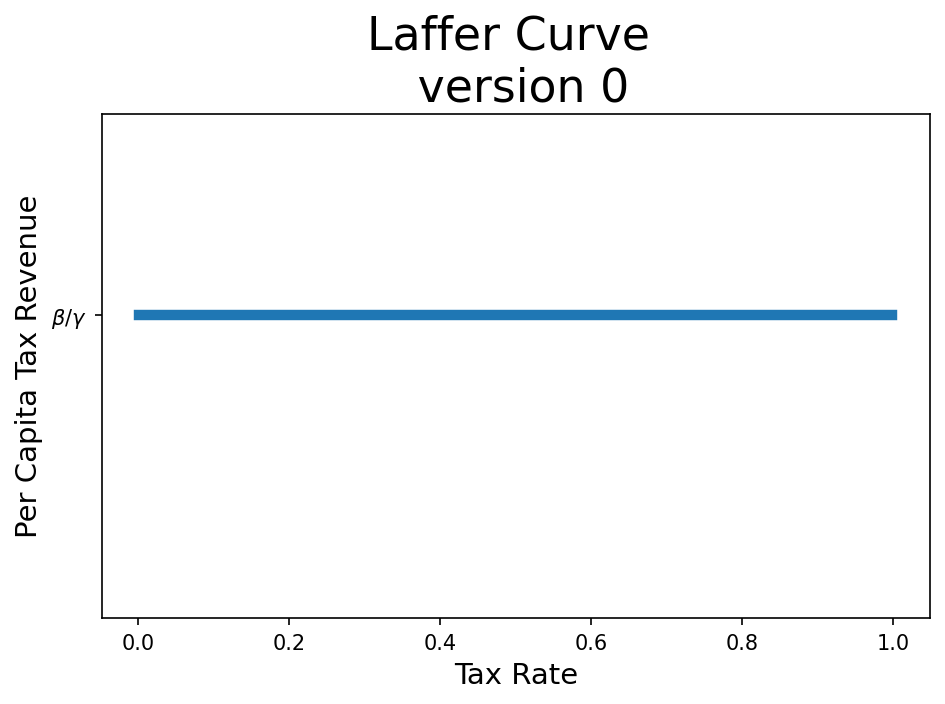

In [2]:
fig, ax = plt.subplots(dpi=150)

tax_rates = np.linspace(0.001, 1-0.001, 100)
revs = np.ones_like(tax_rates)*.6


ax.set_ylim((0, 1))
ax.set_yticks([0.6])
ax.set_yticklabels([r'$\beta / \gamma$'])

ax.plot(tax_rates, revs, linewidth=5)

ax.set_ylabel("Per Capita Tax Revenue", fontsize=14)
ax.set_xlabel("Tax Rate", fontsize=14)
#plt.legend(fontsize=14)
ax.set_title("Laffer Curve \n version 0", fontsize=22)
plt.tight_layout()
fig.savefig("laffer_version_0.png")

### Utility Version 1

As our next simplest possible model, let's make a change. As before
 - flat tax rate: everyone has a fraction $t$ of their earnings taken from you
 - everybody is a clone: All parameters are the same for each person in society

But now
 - tax and dividend: to model services that the government provides all the citizens, we'll say that whatever the government collects in taxes is returned in equal parts to each person. For short, I'll refer to this as UBI (universal basic income). 

This gives us 
$$
U(x) = \beta \log(t\langle s x \rangle + (1-t)sx) - \gamma x
$$
Where the UBI, $t \langle s x \rangle$, is the tax rate $t$ multiplied by the average production per person. 

But notice that because everybody is identical, $\langle s x \rangle = s x$, and so taxes do nothing. 
$$
U(x) = \beta \log(sx) - \gamma x
$$

Obviously we need one more ingredient 

### Utility Version 2

To make this interesting, we need to introduce some variance in the population. 
We'll say that skill, $s$, is distributed lognormally within the population. 


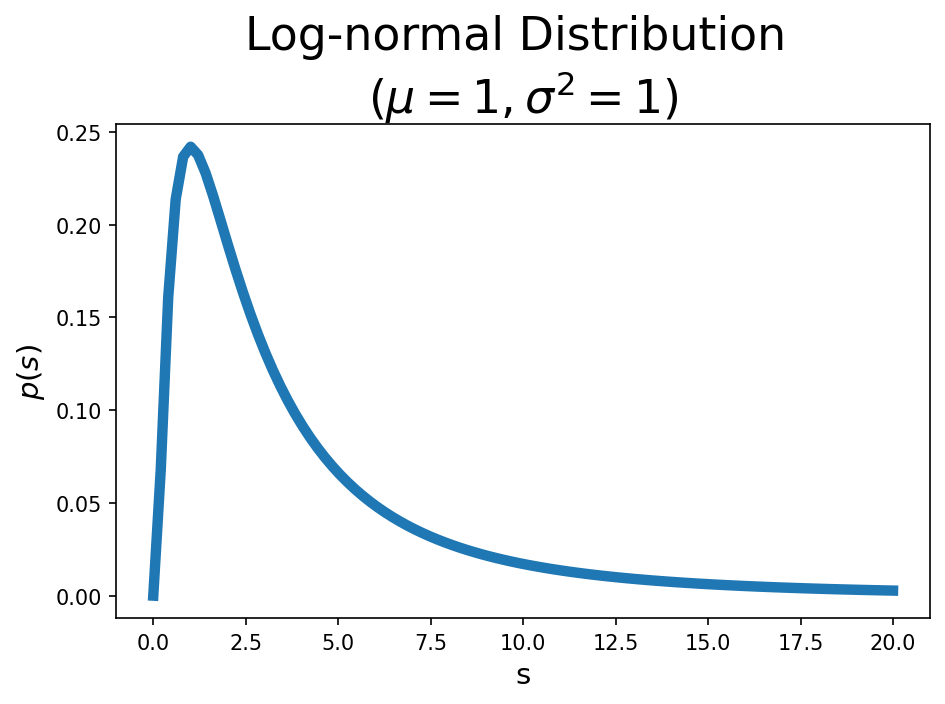

In [3]:
def lognorm_pdf(x, sigma, mu):
    return np.exp(-(np.log(x)-mu)**2 / (2 * sigma**2))/(x*sigma*np.sqrt(2*np.pi))


fig, ax = plt.subplots(dpi=150)

s_vals = np.linspace(0.001, 20, 100)
probs = lognorm_pdf(s_vals, sigma=1, mu=1)


#ax.set_ylim((0, 1))
#ax.set_yticks([0.6])
#ax.set_yticklabels([r'$\beta / \gamma$'])

ax.plot(s_vals, probs, linewidth=5)

ax.set_ylabel(r"$p(s)$", fontsize=14)
ax.set_xlabel("s", fontsize=14)
#plt.legend(fontsize=14)
ax.set_title("Log-normal Distribution \n" + r"($\mu=1, \sigma^2 =1$)", fontsize=22)


plt.tight_layout()

fig.savefig("lognormal.png")

This probably isn't too far from reality, where some people can earn multiple times more than the median person. 
Of course in the real world, greed ($\beta$) and laziness ($\gamma$) would vary as well, but I want to keep things as simple as possible.

Now each individual's utility function isnt so trivial:
$$
U(x) = \beta \log(t\langle s x \rangle + (1-t)sx) - \gamma x
$$

Let's solve for the ammount each person will work, as a function of their skill
$$
x^*(s) = \max(0, x^* \ s.t. \  \frac{dU}{dx}|_{x^*} = 0) = max(0, \frac{\beta}{\gamma} - \frac{t\langle s x \rangle}{(1-t)s})
$$



## Self-consistency

The problem now is that how much each person works is a function of how much UBI income they get, but the UBI income they get is a function of how much each person works. So we need to find a self-consistent solution here. We'll assume some lognormal parameters $\mu$ and $\sigma$ for the distribution of $s$ in the population, and try to find it. 

For this to be self-consistent, we need the expectation to actually be what it should be:
$$
\langle s x^*(s) \rangle = \langle \max\big(0, \frac{s\beta}{\gamma} - \frac{t \langle s x \rangle}{1-t}\big)\rangle = \int_0^{\infty} ds \ \max\big(0, \frac{s\beta}{\gamma} - \frac{ t \langle s x \rangle}{1-t}\big) p_{\mu, \sigma}(s)
$$
Or
$$
\langle s x^*(s) \rangle = \int_{s_{min}}^{\infty} ds \ \left(\frac{s\beta}{\gamma} - \frac{t \langle s x \rangle}{1-t}\right) p_{\mu, \sigma}(s),
\quad 
s_{min} = \frac{t \langle s x \rangle}{1-t}\frac{\gamma}{\beta}
$$
Basically, we need for $\langle s x^*(s) \rangle$ to match $\langle s x \rangle$.

Practically, we can do this by plugging in some temporary value for the mean production, $\langle s x \rangle$, $\lambda$, and sweeping over $\lambda$ until it matches the self-consistent value of $\langle s x^*(s) \rangle$. 

$$
\langle s x^*(s) \rangle_{\lambda} = \langle \max\big(0, \frac{s\beta}{\gamma} - \frac{t \lambda}{1-t}\big)\rangle
$$

In [4]:
# define constants 

# greed to laziness ratio
# we'll say people's utility functions are Greed*money(time_worked) - Laziness*time_worked
B_over_C = 5

# lognomrmal skill distribution parameters
mu = 0
sigma = 1

# tax rate
t=.1

In [5]:
def lognorm_pdf(x, sigma, mu):
    return np.exp(-(np.log(x)-mu)**2 / (2 * sigma**2))/(x*sigma*np.sqrt(2*np.pi))

def lognorm_cdf(x, sigma, mu):
    return (scipy.special.erf((np.log(x)-mu)/(np.sqrt(2)*sigma))+1)/2

def inverse_lognorm_cdf(x, sigma, mu):
    return np.exp(mu + sigma * np.sqrt(2)*scipy.special.erfinv(2*x-1))

def predicted_mean_production(tmp_mean_production, B_over_C, t, sigma, mu):
    def integrand(skill):
        return lognorm_pdf(skill, sigma, mu)*max(0, B_over_C*skill - (t*tmp_mean_production)/(1-t))
    
    min_skill_level = (t*tmp_mean_production)/((1-t)*B_over_C)
    
    result = integrate.quad(lambda skill: integrand(skill), min_skill_level, np.inf)
    
    return result[0]

def determine_mean_production(B_over_C, t, sigma, mu):
    """ 
    integrate to try to determine the fixed point of the mean production
    """
    def error(tmp_mean_production):
        return (tmp_mean_production - predicted_mean_production(tmp_mean_production, B_over_C, t, sigma, mu))**2

    lower_bound=0
    # an upper bound for what the mean production could be 
    high_production = np.exp(mu+2 * sigma + 2 * sigma**2)
    upper_bound = predicted_mean_production(high_production, B_over_C, 0, sigma, mu)
    
    res = minimize_scalar(error, bounds=(lower_bound, upper_bound))

    count=0
    while count<10 and res.fun>10**-8:
        count+=1
        lower_bound=upper_bound
        upper_bound = 2*upper_bound
        res = minimize_scalar(error, bounds=(lower_bound, upper_bound))

    
    assert res.fun<10**-8, "unsuccessful minimum"
    
    
    return res.x, res.fun

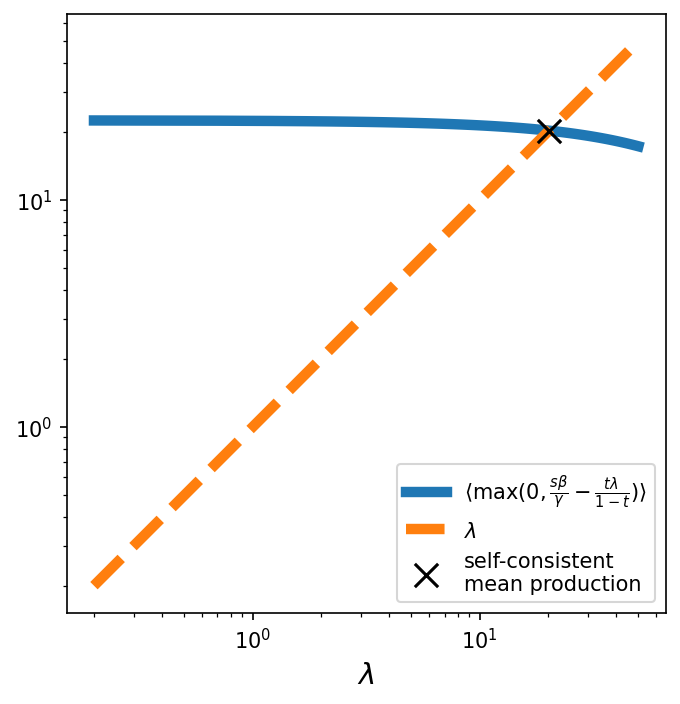

In [6]:
lambdas = np.linspace(2*10**-1, 50, 100)
predicted_mean_prods = [
    predicted_mean_production(
        tmp_mean_production = x, 
        B_over_C = 5, 
        t = .1, 
        sigma = 1, 
        mu = 1
    ) for x in lambdas]

fig, ax = plt.subplots(dpi=150)

eq_str = r"$\langle \max(0, \frac{s\beta}{\gamma} - \frac{t \lambda}{1-t})\rangle$"
lambda_str = r"$\lambda$"

ax.plot(lambdas, predicted_mean_prods, linewidth = 5, linestyle='solid', label=eq_str)
ax.plot(lambdas, lambdas, linewidth = 5, linestyle='dashed', label=lambda_str)

cur_mean_production, fit_error = determine_mean_production(
    B_over_C = 5, 
    t=.1, 
    sigma=1, 
    mu=1
)
ax.scatter(
    [cur_mean_production], 
    [cur_mean_production], 
    marker='x', 
    color='black', 
    s=125, 
    zorder=100,
    label = 'self-consistent\nmean production'
)

ax.set_xlabel(lambda_str, fontsize=14)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect(1)

plt.legend()

#ax.set_title("Self Consi", fontsize=22)
plt.tight_layout()
fig.savefig('self_consistency.png')

# Laffer Curve

Now that we have a way to solve for this, we can compute whatever we want. 

Let's start with what we originally wanted to compute: the Laffer curve --  the mean revenue collected by the government, as a function of tax rate.

In [7]:
def production_and_income_stats(B_over_C, mu, sigma, t):
    """
    # greed to laziness ratio
    B_over_C

    # lognomrmal skill distribution parameters
    mu
    sigma
    
    # tax rate
    t
    """
    cur_mean_production, fit_error = determine_mean_production(B_over_C, t, sigma, mu)
    
    min_skill_level = (t*cur_mean_production + 1)/((1-t)*B_over_C)

    # what's the fraction of the population that will work?
    # note skill ~ exp(mu + z*sigma) where z~N(0, 1)
    fraction_not_working = lognorm_cdf(min_skill_level, sigma, mu)
    
    def predicted_effort(skill):
        if skill<min_skill_level:
            return 0.0
        
        effort = B_over_C - (t*cur_mean_production)/((1-t)*skill)
        
        return effort
    
    def predicted_income(skill):
        """
        If skill is below the work threshold, income is UBI
        """
        if skill<min_skill_level:
            return cur_mean_production*t
        
        return predicted_effort(skill)*skill*(1-t) + cur_mean_production*t
    
    def predicted_utility(skill):
        """
        This is predicted utility, setting C = 1

        U_i(x) = \beta \log\big(t\langle s_i x \rangle + (1-t) s x + 1\big) -\gamma x
        """
        income = predicted_income(skill) 
        
        return B_over_C*np.log(income) - predicted_effort(skill)

    """
    Now let's compute 
    mean effort
    mean income
    mean utility

    We'll integrate on both sides of the skill threshold here 
    """
    def effort_integrand(skill):
        return lognorm_pdf(skill, sigma, mu)*predicted_effort(skill)
        
    def income_integrand(skill):
        return lognorm_pdf(skill, sigma, mu)*predicted_income(skill)

    def utility_integrand(skill):
        return lognorm_pdf(skill, sigma, mu)*predicted_utility(skill)
    
    effort_result_lower = integrate.quad(effort_integrand, 0, min_skill_level)
    effort_result_upper = integrate.quad(effort_integrand, min_skill_level, np.inf)
    effort_result = effort_result_lower[0] + effort_result_upper[0]

    income_result_lower = integrate.quad(income_integrand, 0, min_skill_level)
    income_result_upper = integrate.quad(income_integrand, min_skill_level, np.inf)
    income_result = income_result_lower[0] + income_result_upper[0]

    utility_result_lower = integrate.quad(utility_integrand, 0, min_skill_level)
    utility_result_upper = integrate.quad(utility_integrand, min_skill_level, np.inf)
    utility_result = utility_result_lower[0] + utility_result_upper[0]
    """
    Now use mean revenue and integrate to determine expected utility
    """
    output_dict = {
        "mean_production": cur_mean_production, 
        "mean_effort": effort_result, 
        "min_skill_level": min_skill_level, 
        "mean_income": income_result, 
        "mean_utility": utility_result, 
        "predicted_income": predicted_income, 
        "predicted_effort": predicted_effort,
        "fraction_not_working": fraction_not_working,
        "predicted_income_vs_skill_percentile": lambda p: predicted_income(inverse_lognorm_cdf(p, sigma, mu)), 
        "predicted_effort_vs_skill_percentile": lambda p: predicted_effort(inverse_lognorm_cdf(p, sigma, mu)),
    }

    return output_dict

C:\Users\durrc\AppData\Local\Temp\ipykernel_16888\3108785513.py:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result = integrate.quad(lambda skill: integrand(skill), min_skill_level, np.inf)


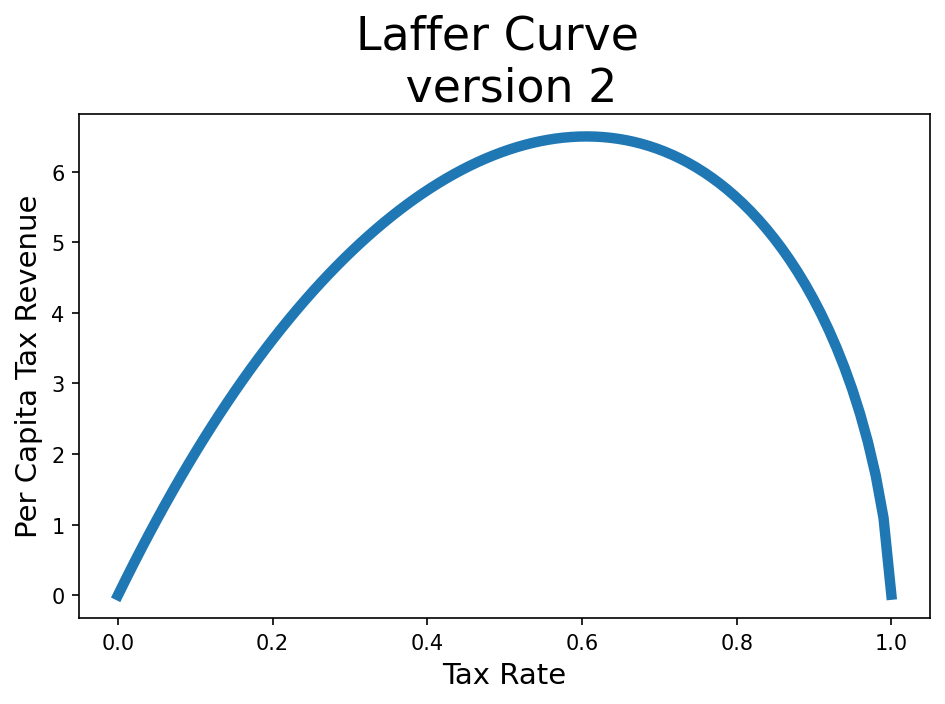

In [8]:
mean_prods = []
mean_revs = []
lower_skill_bounds = []
mean_utilities = []

tax_rates = np.linspace(0.00001, 1-0.00001, 100)

for t in tax_rates:
    stats_dict = production_and_income_stats(
        B_over_C=5, 
        mu=1, 
        sigma=1, 
        t=t
    )

    
    mean_prods.append(stats_dict["mean_production"])
    mean_revs.append(stats_dict["mean_production"]*t)
    lower_skill_bounds.append(stats_dict["min_skill_level"])
    mean_utilities.append(stats_dict["mean_utility"])

fig, ax = plt.subplots(dpi=150)

ax.plot(tax_rates, mean_revs, linewidth=5)

ax.set_ylabel("Per Capita Tax Revenue", fontsize=14)
ax.set_xlabel("Tax Rate", fontsize=14)

ax.set_title("Laffer Curve \n version 2", fontsize=22)

max_tax = tax_rates[np.argmax(mean_revs)]
max_rev = np.max(mean_revs)


plt.tight_layout()
fig.savefig("laffer_version_2.png")

Now let's compute something else: instead of asking for the revenue as a function of tex rate, let's compute the mean utility as a function of tax rate. 

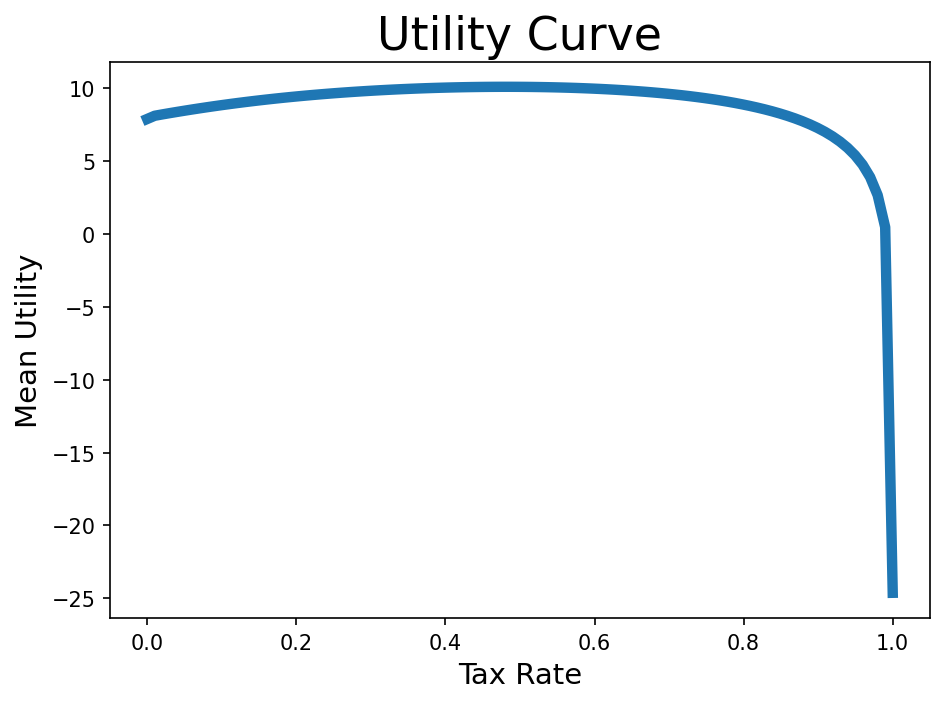

In [9]:
fig, ax = plt.subplots(dpi=150)

ax.plot(tax_rates, np.array(mean_utilities), linewidth=5)

ax.set_ylabel("Mean Utility", fontsize=14)
ax.set_xlabel("Tax Rate", fontsize=14)

ax.set_title("Utility Curve", fontsize=22)
#ax.set_yscale("log")
plt.tight_layout()
fig.savefig("utility_version_2.png")

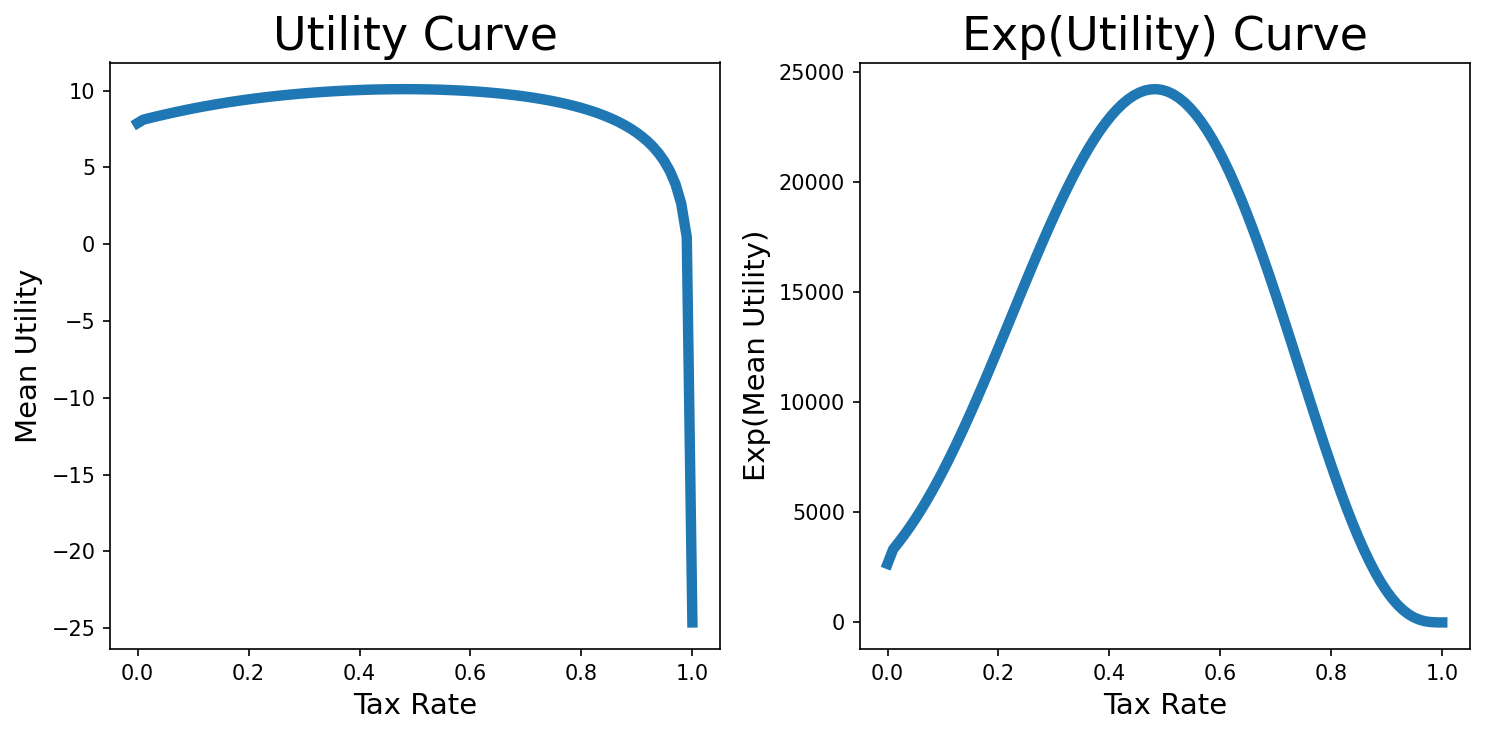

In [10]:
fig, ax = plt.subplots(1, 2, dpi=150, figsize=(10, 5))


ax[0].plot(tax_rates, np.array(mean_utilities), linewidth=5)

ax[0].set_ylabel("Mean Utility", fontsize=14)
ax[0].set_xlabel("Tax Rate", fontsize=14)

ax[0].set_title("Utility Curve", fontsize=22)


ax[1].plot(tax_rates, np.exp(np.array(mean_utilities)), linewidth=5)

ax[1].set_ylabel("Exp(Mean Utility)", fontsize=14)
ax[1].set_xlabel("Tax Rate", fontsize=14)

ax[1].set_title("Exp(Utility) Curve", fontsize=22)

#ax.set_yscale("log")
plt.tight_layout()
fig.savefig("utility_version_2.png")

Another interesting result of flat tax+UBI here is that sometimes, you shouldn't work. We can see the lowest income where working is just barely worthwhile

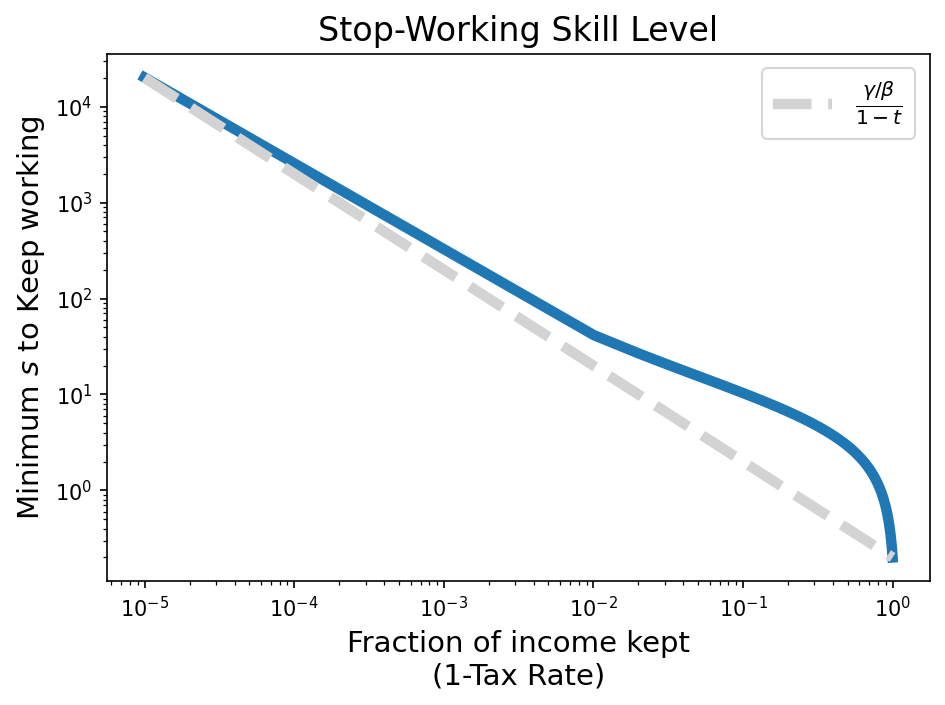

In [11]:
fig, ax = plt.subplots(dpi=150)

ax.set_title("Stop-Working Skill Level", fontsize=16)

ax.plot(tax_rates, lower_skill_bounds[::-1], linewidth=5)

ax.plot(tax_rates, (1/5/(1-tax_rates))[::-1], linewidth=5, color='lightgrey', linestyle='dashed', label=r"$\frac{\gamma / \beta}{1-t}$")

ax.set_ylabel(r"Minimum $s$ to Keep working", fontsize=14)
ax.set_xlabel("Fraction of income kept\n(1-Tax Rate)", fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()
fig.savefig("stop_working.png")

That bump to the right comes from the fact that as the tax rate drops to zero, the UBI drops, your alternative to working gets worse, and so more people work. 

# One final question

Suppose all we care about is minimizing the suffering of the poorest people -- Under this model, this means we want to maximize per capita tax revenue, since this goes right back into everyone's pocket. We can do this by sweeping over tax rates and choosing the one that lands us on the pealk of the laffer curve. 

So, given only what we have laid out, what kind of distribution in income leads to the most returns for the poorest people?

Again, we're supposing that skill is distributed lognormally. Let's fix one of the two degrees of freedom and assert that in our society, the mean skill is fixed. 
$$
\text{mean skill} = \exp(\mu + \sigma^2 / 2)
$$
and define an inequality parameter
$$
\delta = \frac{1}{2}\left( \sigma^2 / 2 - \mu \right)
$$
which we can vary without influencing the mean 

Our other parameter allows us to basically control skill inequality. 

In [12]:
def determine_optimal_tax_rate(B_over_C, sigma, mu):
    res = minimize_scalar(
        lambda t: -t*determine_mean_production(B_over_C, t, sigma, mu)[0],
        bounds=(0, 1)
    )

    opt_t = res.x
    opt_mean_prod = -res.fun/opt_t

    return opt_t, opt_mean_prod

In [13]:
def ineq_sweep(B_over_C, sigma_0, mu_0, delta_min, delta_max):
    assert delta_min<delta_max
    assert sigma_0**2 + 2*delta_min>=0
    deltas = np.linspace(delta_min, delta_max, 50)
    
    results_dict = defaultdict(list)
    
    
    for delta in deltas:
        opt_t, opt_mean_prod = determine_optimal_tax_rate(B_over_C, sigma_0 + 2*delta, mu - delta)
        results_dict["opt_tax_rates"].append(opt_t)
        results_dict["opt_mean_prods"].append(opt_mean_prod)
        results_dict["opt_mean_revs"].append(opt_t*opt_mean_prod)
        results_dict["deltas"].append(delta)

        min_skill_level = (opt_t*opt_mean_prod + 1)/((1-opt_t)*B_over_C)
    
        # what's the fraction of the population that will work?
        # note skill ~ exp(mu + z*sigma) where z~N(0, 1)
        fraction_not_working = lognorm_cdf(min_skill_level, sigma_0 + 2*delta, mu - delta)

        stats_dict = production_and_income_stats(
            B_over_C=B_over_C, 
            mu=mu - delta, 
            sigma=sigma_0 + 2*delta, 
            t=opt_t
        ) 
        for k in stats_dict:
            results_dict[k].append(stats_dict[k])
        """
        Above, we add
        "mean_production": cur_mean_production, 
        "mean_effort": effort_result, 
        "min_skill_level": min_skill_level, 
        "mean_income": income_result, 
        "mean_utility": utility_result, 
        "predicted_income": predicted_income, 
        "predicted_effort": predicted_effort,
        "fraction_not_working": fraction_not_working,
        """

        results_dict["fraction_not_working"].append(fraction_not_working)
        
        #stats_dict = production_and_income_stats(B_over_C, sigma_0 + 2*delta, mu - delta, opt_t)
        #for k, v in stats_dict.items():
        #    results_dict[k].append(v)

    for k in results_dict:
        results_dict[k]=np.array(results_dict[k])

    return results_dict 
    

In [14]:
ineq_results = ineq_sweep(B_over_C=5, sigma_0=0.01, mu_0=1, delta_min=0, delta_max=1.5)

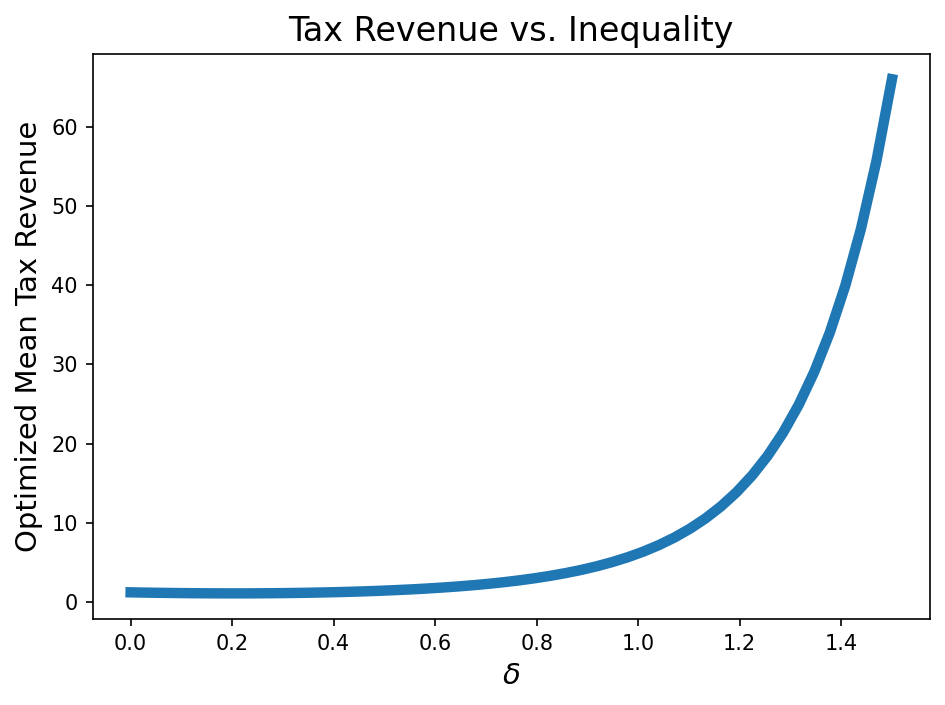

In [15]:
fig, ax = plt.subplots(dpi=150)

ax.set_title("Tax Revenue vs. Inequality", fontsize=16)

ax.plot(ineq_results['deltas'], ineq_results["opt_mean_revs"], linewidth=5)
plt.tight_layout()
ax.set_ylabel("Optimized Mean Tax Revenue", fontsize=14)
ax.set_xlabel("$\delta$", fontsize=14)
plt.tight_layout()
fig.savefig("optimized_rev_vs_ineq.png")


Interestingly, the greater the skill inequality, the more the poorest people get -- even when fixing the average amount of skill.
You might be thinking "Well I don't like this -- somehow those fancy high-skill workers are somehow still getting all the money!"

But if you look at what's actually happening, we basically have a bunch of high-skill adderalled techbro slaves pulling 23 hour days. These guys make insane salaries, but only keep a small fraction of what they earn. All the rest gets given to non-workers, who chill on the beach all day drinking margaritas. 

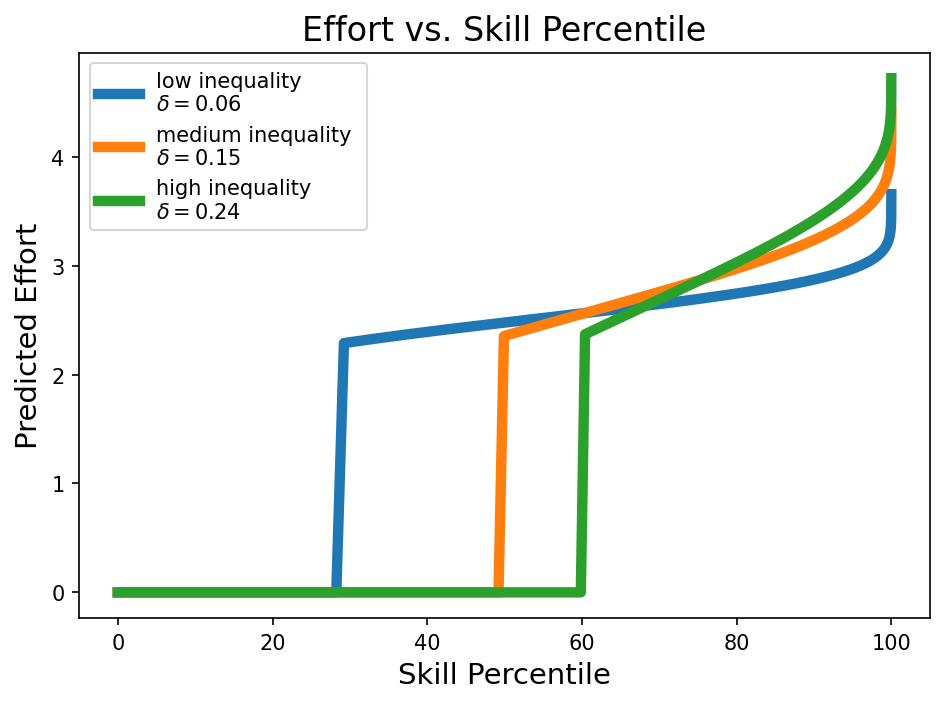

In [18]:
fig, ax = plt.subplots(dpi=150)

ax.set_title("Effort vs. Skill Percentile", fontsize=16)

delta_0 = round(ineq_results['deltas'][2], 2)
delta_1 = round(ineq_results['deltas'][5], 2)
delta_2 = round(ineq_results['deltas'][8], 2)

s_values = 1-np.logspace(-6, 0, 1000)

ax.plot(s_values*100, [ineq_results["predicted_effort_vs_skill_percentile"][2](s) for s in s_values], linewidth=5, label = "low inequality \n"+rf"$\delta={delta_0}$")
ax.plot(s_values*100, [ineq_results["predicted_effort_vs_skill_percentile"][5](s) for s in s_values], linewidth=5, label = "medium inequality \n"+rf"$\delta={delta_1}$")
ax.plot(s_values*100, [ineq_results["predicted_effort_vs_skill_percentile"][8](s) for s in s_values], linewidth=5, label = "high inequality \n"+rf"$\delta={delta_2}$")


ax.set_ylabel("Predicted Effort", fontsize=14)
ax.set_xlabel("Skill Percentile", fontsize=14)

plt.legend()
plt.tight_layout()
fig.savefig("rev_vs_s_percentile.png")


As we increase the inequality, a higher fraction of people no longer work. Meanwhile, those at the highest skill levels work even harder. 

Where is all that income going?

Well if we look at the tax rate, it's being taken by the government -- and given to everyone. 

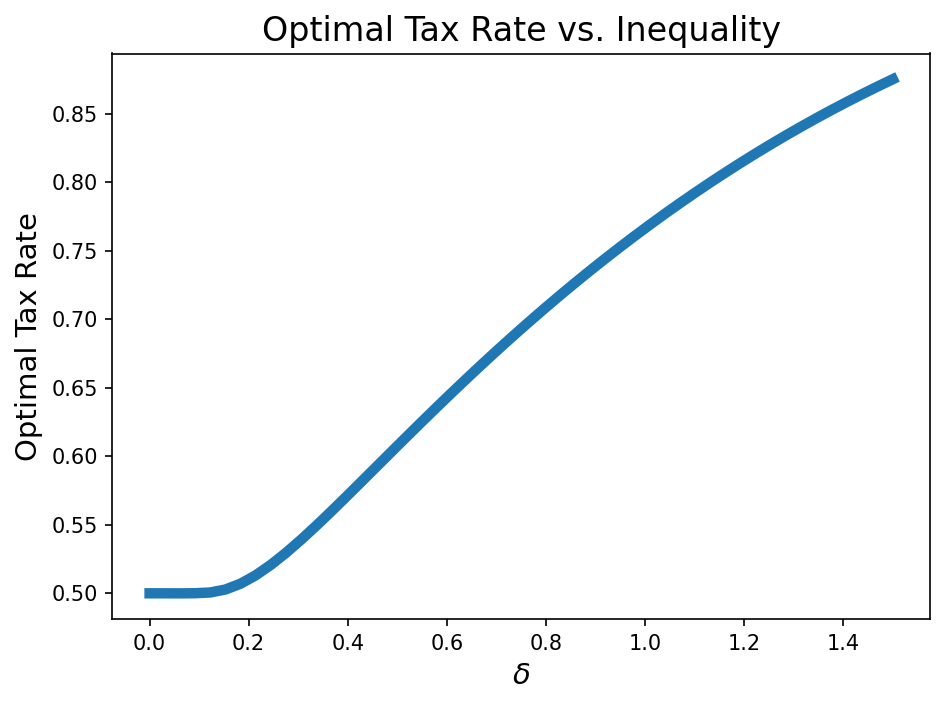

In [17]:
fig, ax = plt.subplots(dpi=150)

ax.set_title("Optimal Tax Rate vs. Inequality", fontsize=16)

ax.plot(ineq_results['deltas'], ineq_results["opt_tax_rates"], linewidth=5)
plt.tight_layout()
ax.set_ylabel("Optimal Tax Rate", fontsize=14)
ax.set_xlabel("$\delta$", fontsize=14)
plt.tight_layout()
fig.savefig("optimized_t_vs_ineq.png")


In conclusion, I have no idea what any of all this actually means, (would that be a utopia or a dystopia? I don't know). 

But it's at least satisfying to be able to produce a Laffer curve using something other than a napkin and common sense.  